In [1]:
import numpy as nm  
import matplotlib.pyplot as mtp  
import pandas as pd  
    
dataset = pd.read_csv('data.csv')  
x = dataset.iloc[:, [2, 3]].values  
y = dataset.iloc[:, 4].values  
   
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)  
    
from sklearn.preprocessing import StandardScaler  
sc = StandardScaler()  
x_train = sc.fit_transform(x_train)  
x_test = sc.transform(x_test)  

In [2]:
dataset

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
0,0,7,7,1,6,6,36,3,1,1
1,190,1,3,3,5,1,20,4,1,0
2,31,7,2,2,6,1,24,6,1,0
3,83,4,3,4,5,1,28,6,1,0
4,640,7,5,6,4,0,68,6,1,0
...,...,...,...,...,...,...,...,...,...,...
939,0,7,7,1,6,4,73,6,24,1
940,0,7,5,2,6,6,50,6,24,1
941,0,3,6,2,7,5,43,6,24,1
942,0,6,6,2,5,6,46,7,24,1


<Axes: xlabel='fail', ylabel='count'>

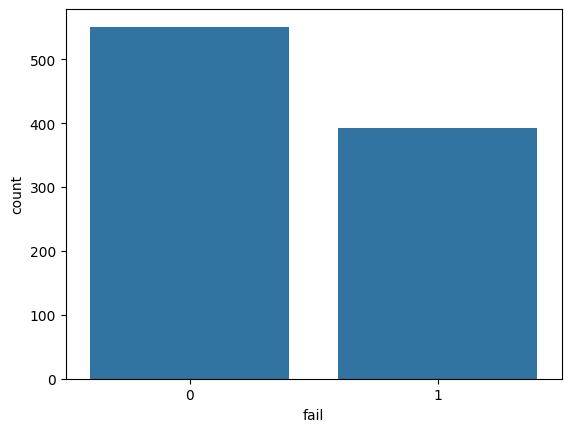

In [3]:
import seaborn as sns
sns.countplot(x='fail', data=dataset)

In [4]:
dataset.describe()

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
count,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000
mean,306.381356,3.727754,4.325212,2.939619,5.394068,2.842161,47.043432,4.565678,16.331568,0.416314
std,1082.606745,2.677235,1.438436,1.383725,1.269349,2.273337,16.423130,1.599287,5.974781,0.493208
min,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,19.000000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,3.000000,2.000000,5.000000,1.000000,34.000000,3.000000,14.000000,0.000000
50%,22.000000,3.000000,4.000000,3.000000,6.000000,2.000000,44.000000,4.000000,17.000000,0.000000
75%,110.000000,7.000000,6.000000,4.000000,6.000000,5.000000,58.000000,6.000000,21.000000,1.000000
max,7300.000000,7.000000,7.000000,7.000000,7.000000,6.000000,91.000000,7.000000,24.000000,1.000000


In [5]:
dataset.columns

Index(['footfall', 'tempMode', 'AQ', 'USS', 'CS', 'VOC', 'RP', 'IP',
       'Temperature', 'fail'],
      dtype='object')

In [6]:
dataset['fail']

0      1
1      0
2      0
3      0
4      0
      ..
939    1
940    1
941    1
942    1
943    1
Name: fail, Length: 944, dtype: int64

In [7]:
from imblearn.over_sampling import SMOTE

In [8]:
smote = SMOTE(random_state=42)
X = dataset.drop(['fail'],axis=1)
y = dataset['fail']
X_res, y_res = smote.fit_resample(X, y)


In [9]:
print('Original dataset shape:', y.value_counts())
print('Resampled dataset shape:', pd.Series(y_res).value_counts())

Original dataset shape: fail
0    551
1    393
Name: count, dtype: int64
Resampled dataset shape: fail
1    551
0    551
Name: count, dtype: int64


In [10]:
X_res

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature
0,0,7,7,1,6,6,36,3,1
1,190,1,3,3,5,1,20,4,1
2,31,7,2,2,6,1,24,6,1
3,83,4,3,4,5,1,28,6,1
4,640,7,5,6,4,0,68,6,1
...,...,...,...,...,...,...,...,...,...
1097,0,7,5,1,5,5,69,3,5
1098,9,5,6,1,5,5,68,6,20
1099,29,2,6,1,6,5,39,5,12
1100,900,4,5,2,5,5,75,3,14


In [11]:
y_res

0       1
1       0
2       0
3       0
4       0
       ..
1097    1
1098    1
1099    1
1100    1
1101    1
Name: fail, Length: 1102, dtype: int64

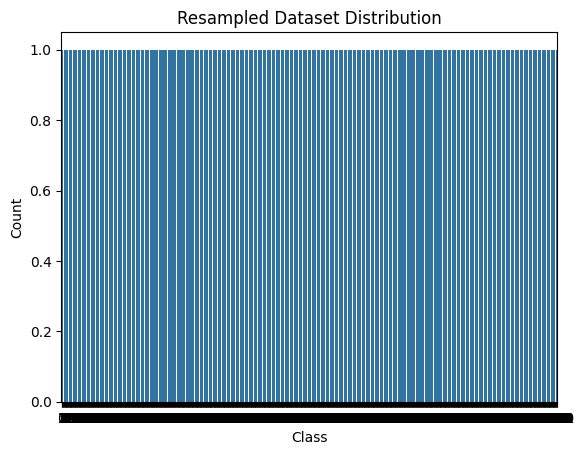

In [12]:
import matplotlib.pyplot as plt
sns.countplot(y_res)
plt.title('Resampled Dataset Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [13]:
X

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature
0,0,7,7,1,6,6,36,3,1
1,190,1,3,3,5,1,20,4,1
2,31,7,2,2,6,1,24,6,1
3,83,4,3,4,5,1,28,6,1
4,640,7,5,6,4,0,68,6,1
...,...,...,...,...,...,...,...,...,...
939,0,7,7,1,6,4,73,6,24
940,0,7,5,2,6,6,50,6,24
941,0,3,6,2,7,5,43,6,24
942,0,6,6,2,5,6,46,7,24


In [14]:
y

0      1
1      0
2      0
3      0
4      0
      ..
939    1
940    1
941    1
942    1
943    1
Name: fail, Length: 944, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.2, random_state = 2)

In [16]:
len(X_train)

881

In [17]:
len(X_test)

221

In [18]:
881+221

1102

In [19]:
len(X_res)

1102

In [20]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [21]:
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
y_pred = nb_classifier.predict(X_test)

In [22]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[ 94   8]
 [  6 113]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       102
           1       0.93      0.95      0.94       119

    accuracy                           0.94       221
   macro avg       0.94      0.94      0.94       221
weighted avg       0.94      0.94      0.94       221


Accuracy Score:
0.9366515837104072


In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [24]:
error_rate = []
for i in range(1, 41):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error_rate.append(1 - accuracy_score(y_test, y_pred))

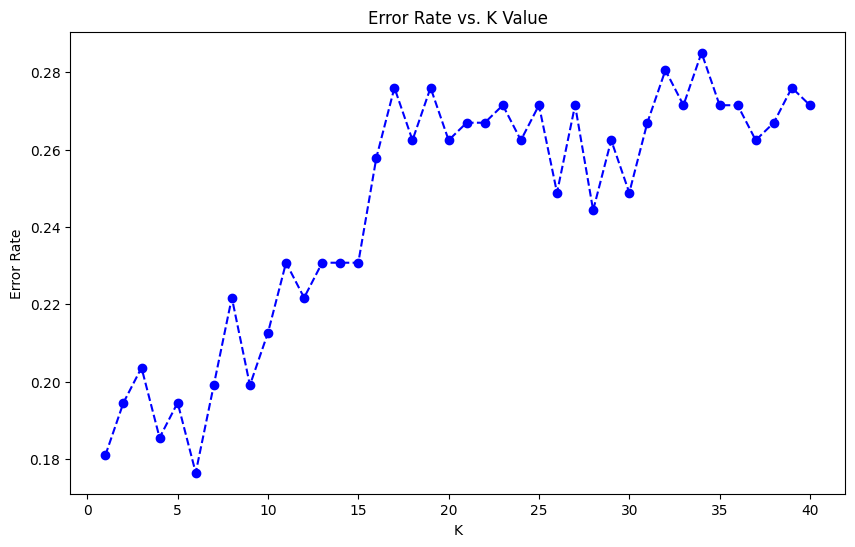

The best number of neighbors is 6


In [25]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 41), error_rate, marker='o', linestyle='dashed', color='b')
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()
best_k = error_rate.index(min(error_rate)) + 1
print(f'The best number of neighbors is {best_k}')

In [26]:
knn_classifier = KNeighborsClassifier(n_neighbors=6)
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[91 11]
 [28 91]]

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.89      0.82       102
           1       0.89      0.76      0.82       119

    accuracy                           0.82       221
   macro avg       0.83      0.83      0.82       221
weighted avg       0.83      0.82      0.82       221


Accuracy Score:
0.8235294117647058


In [30]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from scipy.stats import uniform, randint

In [31]:
param_dist = {
    'C': uniform(0.1, 100), 
    'gamma': uniform(0.001, 10),
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}
svm = SVC()
random_search = RandomizedSearchCV(svm, param_distributions=param_dist, n_iter=50, cv=3, verbose=2, n_jobs=-1, random_state=42)


In [ ]:
random_search.fit(X_train, y_train)
print("Best parameters found: ", random_search.best_params_)
print("Best estimator found: ", random_search.best_estimator_)
best_svm = random_search.best_estimator_
y_pred = best_svm.predict(X_test)           
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8, 16]
}
dt = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(dt, param_grid, cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_train_res, y_train_res) 
print("Best parameters found: ", grid_search.best_params_)
print("Best estimator found: ", grid_search.best_estimator_)

In [ ]:
best_dt = grid_search.best_estimator_
y_pred = best_dt.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))